In [1]:
import pandas as pd

In [6]:
! ls data/data/2nd_distance_measurement/clientParsed/

dump_parsed.csv   gps_trace_corrected.csv  ping_parsed.csv
dump_parsed.xlsx  iperf_parsed.csv


In [15]:
iperf = pd.read_csv('data/2nd_distance_measurement/clientParsed/iperf_parsed.csv').drop(columns=['Unnamed: 0'])

In [18]:
gps = pd.read_csv('data/2nd_distance_measurement/clientParsed/gps_trace_corrected.csv')#.drop(columns=['Unnamed: 0'])

In [19]:
ping = pd.read_csv('data/2nd_distance_measurement/clientParsed/ping_parsed.csv').drop(columns=['Unnamed: 0'])

In [21]:
df = pd.merge(iperf, gps, on='timestamp')

In [23]:
df = pd.merge(df, ping, on ='timestamp')

In [25]:
distance_df = df[['lat','lon','datarate','distance']]

In [27]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'datarate in bits/s')

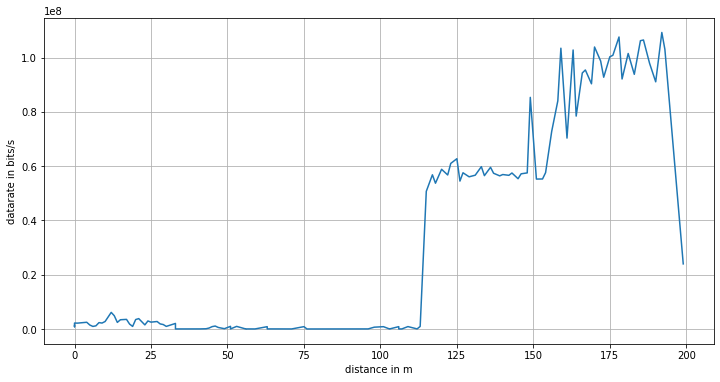

In [31]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(distance_df.distance, distance_df.datarate)
plt.xlabel('distance in m')
plt.ylabel('datarate in bits/s')

In [41]:
import folium
from folium import plugins
from folium.plugins import HeatMap


In [42]:
heat_df = distance_df[['lat','lon','datarate']]

In [43]:
map_hooray = folium.Map(location=[distance_df.lat[0], distance_df.lon[0]],
                    zoom_start = 13) 

In [44]:
HeatMap(heat_df).add_to(map_hooray)

# Display the map
map_hooray